In [2]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)


import numpy as np
import matplotlib.pyplot as plt
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

from scripts.load_data import load_train, load_test

## CNN bouwen

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Het importeren en bewerken van de data 
#train_images, train_labels = load_train()
#test_images, test_labels = load_test()

# Normalizeren van de images
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshapen van de images zodat ze de juiste dimensies hebben
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [4]:
# Onze CNN

# Stap 1: bepaal hoeveel filters je wilt, hoe groot je filter size moet zijn (let op je filter size mag niet te groot zijn vergeleken met je images), en wat je pool size is. 
num_filters = 8
filter_size = 5
pool_size =  2

# Stap 2: maak het model.
#    In de array die je aan sequential meegeeft, zet je alle layers die in het model moeten:
#    Conv2D, parameters: num_filters, filter_size, input_shape=(x, y, z)
#    MaxPooling2D, parameters: pool_size=pool_size
#    Flatten,
#    Dense, parameters: aantal outputs, activation='softmax'

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [5]:
# Stap 3: het compilen van het model. 
# model.compile parameters: 'adam', loss='categorial_crossentropy', metrics=['accuracy']
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


# Stap 4: fit het model. 
#    Data om op te trainen: train_images, to_categorial(train_labels)
#    epochs = 3
#    validation_data = test_images, to_categorial(test_labels)
#model.fit(train_images, to_categorical(train_labels), epochs=3,validation_data=(test_images, to_categorical(test_labels))
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2897 - accuracy: 0.9171 - val_loss: 0.1448 - val_accuracy: 0.9577
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1301 - accuracy: 0.9626 - val_loss: 0.1058 - val_accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0958 - accuracy: 0.9719 - val_loss: 0.0791 - val_accuracy: 0.9748


In [6]:
# Stap 5: evalueer het model
test_loss, test_acc = model.evaluate(test_images,  to_categorical(test_labels), verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0791 - accuracy: 0.9748 - 1s/epoch - 3ms/step
0.9747999906539917


In [7]:
# Stap 6: extra layer(s). Wat gebeurt er als je een extra Conv Layer toevoegd aan je model? 
#    Voeg een extra layer(s) toe en train het model opnieuw. 
num_filters = 8
filter_size = 5
pool_size =  2

model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    Conv2D(num_filters, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10, activation='softmax'),
])

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

test_loss, test_acc = model.evaluate(test_images,  to_categorical(test_labels), verbose=2)
print(test_acc)

# Stap 7: parameters. Wat gebeurt er bijvoorbeeld als je geen softmax gebruikt maar een andere activatie? 
#    Pas op z'n minst 1 parameter aan en train je model opnieuw. 
# ja dan is het tiefus in accuraat
model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    Conv2D(num_filters, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(10, activation='relu'),
])

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1900 - accuracy: 0.9434 - val_loss: 0.0707 - val_accuracy: 0.9773
Epoch 2/3
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0712 - accuracy: 0.9778 - val_loss: 0.0574 - val_accuracy: 0.9826
Epoch 3/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0570 - accuracy: 0.9828 - val_loss: 0.0536 - val_accuracy: 0.9830
313/313 - 1s - loss: 0.0536 - accuracy: 0.9830 - 1s/epoch - 3ms/step
0.9829999804496765
Epoch 1/3
1875/1875 [==============================] - 24s 13ms/step - loss: nan - accuracy: 0.1044 - val_loss: nan - val_accuracy: 0.0980
Epoch 2/3
1875/1875 [==============================] - 23s 12ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980
Epoch 3/3
1875/1875 [==============================] - 22s 12ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980


## CIFAR-10

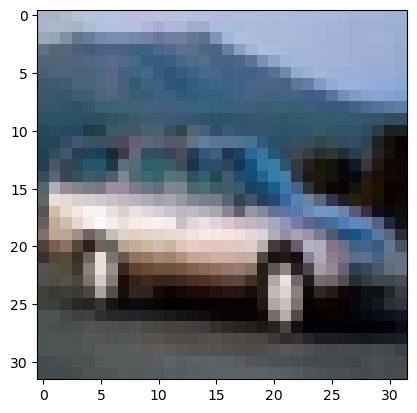

In [8]:
# Data inladen
(train_images10, train_labels10), (test_images10, test_labels10) = cifar10.load_data()

plt.imshow(train_images10[4])
plt.show()

# Normalizeren
train_images10, test_images10 = train_images10 / 255.0, test_images10 / 255.0

In [9]:
# Stap 8: bouw je eigen CNN voor de CIFAR-10 dataset. 
# Tip: gebruik meerdere Conv2D en MaxPooling layers
# LET OP: gebruik 'softmax' alleen bij je laatste Dense layer. Gebruik 'relu' voor de andere Conv2D/Dense layers. 
model_cif = Sequential([
    Conv2D(80, (3,3), input_shape=train_images10[0].shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(80, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax'),
])

model_cif.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [10]:
model_cif.fit(
  train_images10,
  to_categorical(train_labels10),
  epochs=   10, #hint: meer dan 3,
  validation_data=(test_images10, to_categorical(test_labels10)),
)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4343 - accuracy: 0.4871 - val_loss: 1.1412 - val_accuracy: 0.5976
Epoch 2/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.0763 - accuracy: 0.6267 - val_loss: 1.0515 - val_accuracy: 0.6272
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9508 - accuracy: 0.6715 - val_loss: 0.9515 - val_accuracy: 0.6743
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8678 - accuracy: 0.6988 - val_loss: 0.9480 - val_accuracy: 0.6769
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7992 - accuracy: 0.7226 - val_loss: 0.9908 - val_accuracy: 0.6634
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7480 - accuracy: 0.7406 - val_loss: 0.9624 - val_accuracy: 0.6769
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6996 - accuracy: 0.7579 - val_loss: 0.9159 -

In [11]:
test_loss, test_acc = model_cif.evaluate(test_images10,  to_categorical(test_labels10), verbose=2)

313/313 - 3s - loss: 0.9612 - accuracy: 0.6985 - 3s/epoch - 10ms/step


In [12]:
print(test_acc)

0.6984999775886536


## Bronnen
* https://victorzhou.com/blog/keras-cnn-tutorial/ Bezocht: 9/3/2020
* https://www.tensorflow.org/tutorials/images/cnn Bezocht: 13/3/2020